# The module 7 by analytics : 

## lesson 1 - 2

In [32]:
import csv

In [71]:
file_path = 'click_stream3.csv'

In [72]:
with open(file_path, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file,
                                fieldnames=['ID', 'page', 'date'])
    type_page = {}
    for row in csv_reader:
        page = list(row.items())[1][1]
        if page not in type_page:
            type_page[page] = 1
        else:
            type_page[page] += 1

In [126]:
mounth = {'01': 'January',
          '02': 'February',
          '03': 'March',
          '04': 'April'}

In [73]:
type_page

{'1_home_page': 90400,
 '2_search_page': 45200,
 '3_payment_page': 6030,
 '4_payment_confirmation_page': 452}

In [75]:
def count_funnel(curr_p:int, init_p:int):
    return curr_p / init_p
init_position = type_page['1_home_page']
for _type, _count in type_page.items():
    print(f'Customers that was on the page {_type}: {_count} It is {count_funnel(_count, init_position)}% ')

Customers that was on the page 1_home_page: 90400 It is 1.0% 
Customers that was on the page 2_search_page: 45200 It is 0.5% 
Customers that was on the page 3_payment_page: 6030 It is 0.06670353982300885% 
Customers that was on the page 4_payment_confirmation_page: 452 It is 0.005% 


In [36]:
import pandas as pd
customers = pd.read_csv(file_path)

In [24]:
customers

,id,page,date,os,sex
0,313593,1_home_page,2015-02-26,Desktop,Female
1,468315,1_home_page,2015-02-21,Desktop,Male
2,264005,1_home_page,2015-03-25,Desktop,Female
3,290784,1_home_page,2015-03-14,Desktop,Male
4,639104,1_home_page,2015-01-03,Desktop,Female
...,...,...,...,...,...
142077,397473,4_payment_confirmation_page,2015-01-12,Mobile,Female
142078,860829,4_payment_confirmation_page,2015-02-07,Mobile,Female
142079,371291,4_payment_confirmation_page,2015-02-17,Mobile,Female
142080,263707,4_payment_confirmation_page,2015-03-20,Mobile,Female


In [31]:
customers['page'].value_counts()

1_home_page                    90400
2_search_page                  45200
3_payment_page                  6030
4_payment_confirmation_page      452
Name: page, dtype: int64

In [58]:
customers_confirmation = customers['page'].value_counts()[3] / customers['page'].value_counts()[0]
customers_confirmation

0.005

## lesson 3-4

In [145]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [129]:
file_path = 'click_stream3_wit_name_column.csv'

In [130]:
df = pd.read_csv(file_path)

In [131]:
df.head(10)

,id,page,date,os,sex
0,313593,1_home_page,2015-02-26,Desktop,Female
1,468315,1_home_page,2015-02-21,Desktop,Male
2,264005,1_home_page,2015-03-25,Desktop,Female
3,290784,1_home_page,2015-03-14,Desktop,Male
4,639104,1_home_page,2015-01-03,Desktop,Female
5,262889,1_home_page,2015-01-10,Mobile,Male
6,708793,1_home_page,2015-04-24,Mobile,Female
7,943143,1_home_page,2015-04-10,Desktop,Male
8,417894,1_home_page,2015-04-02,Mobile,Female
9,729374,1_home_page,2015-04-12,Desktop,Male


In [132]:
df['month'] = pd.to_datetime(df['date'], format="%Y-%m-%d").dt.month_name()

In [133]:
df.head(10)

,id,page,date,os,sex,month
0,313593,1_home_page,2015-02-26,Desktop,Female,February
1,468315,1_home_page,2015-02-21,Desktop,Male,February
2,264005,1_home_page,2015-03-25,Desktop,Female,March
3,290784,1_home_page,2015-03-14,Desktop,Male,March
4,639104,1_home_page,2015-01-03,Desktop,Female,January
5,262889,1_home_page,2015-01-10,Mobile,Male,January
6,708793,1_home_page,2015-04-24,Mobile,Female,April
7,943143,1_home_page,2015-04-10,Desktop,Male,April
8,417894,1_home_page,2015-04-02,Mobile,Female,April
9,729374,1_home_page,2015-04-12,Desktop,Male,April


In [137]:
df.groupby('month')

In [147]:
month_page = df.groupby('month')['page'].value_counts()
month_page

month     page                       
April     1_home_page                    22600
          2_search_page                   9080
          3_payment_page                   597
          4_payment_confirmation_page       46
February  1_home_page                    22600
          2_search_page                  13687
          3_payment_page                  2412
          4_payment_confirmation_page      173
January   1_home_page                    22600
          2_search_page                  13554
          3_payment_page                  2390
          4_payment_confirmation_page      189
March     1_home_page                    22600
          2_search_page                   8879
          3_payment_page                   631
          4_payment_confirmation_page       44
Name: page, dtype: int64

<AxesSubplot:xlabel='month,page'>

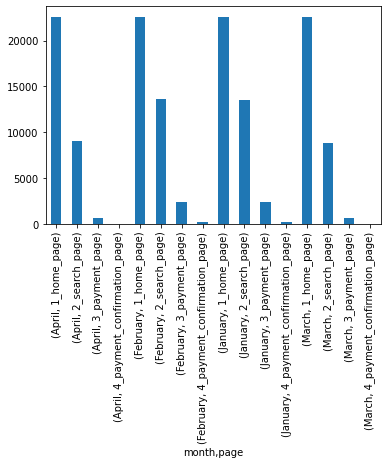

In [151]:
month_page.plot(kind='bar')

## lesson 5

In [205]:
month_page = df.groupby('page')[['os', 'month']]
month_page.head()

,os,month
0,Desktop,February
1,Desktop,February
2,Desktop,March
3,Desktop,March
4,Desktop,January
90400,Desktop,March
90401,Desktop,March
90402,Mobile,April
90403,Desktop,March
90404,Desktop,March


In [204]:
pd.DataFrame()

,0,1
0,1_home_page,id page date o...
1,2_search_page,id page date ...
2,3_payment_page,id page date ...
3,4_payment_confirmation_page,id page ...


 <b>home page</b> - no obvious problem<br>
 <b>search page</b> - no obvious problem<br>
 <b>payment page</b> - desktop version have a conversia 3010 / 30100 = 10% сompared with mobile - 3020 / 15100 = 20%<br>
 <b>payment confirmation page</b> - here is obvious problem look at desktop, too 150/3010 = 5% compared with mobile - 302/3020 = 10%
 